In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from autograd import numpy
from autograd import grad

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train_data = pd.read_csv('./data/winequality-red.csv')

In [3]:
print(f"train_data shape : {train_data.shape} \n")
train_data.head()

train_data shape : (1439, 12) 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


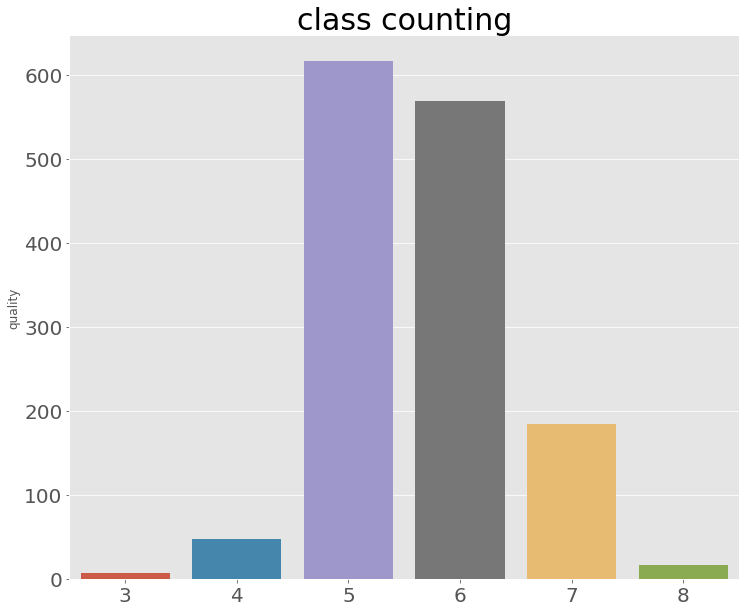

In [4]:
counted_values = train_data['quality'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('class counting', fontsize = 30)
value_bar_ax = sns.barplot(x=counted_values.index, y=counted_values)
value_bar_ax.tick_params(labelsize=20)

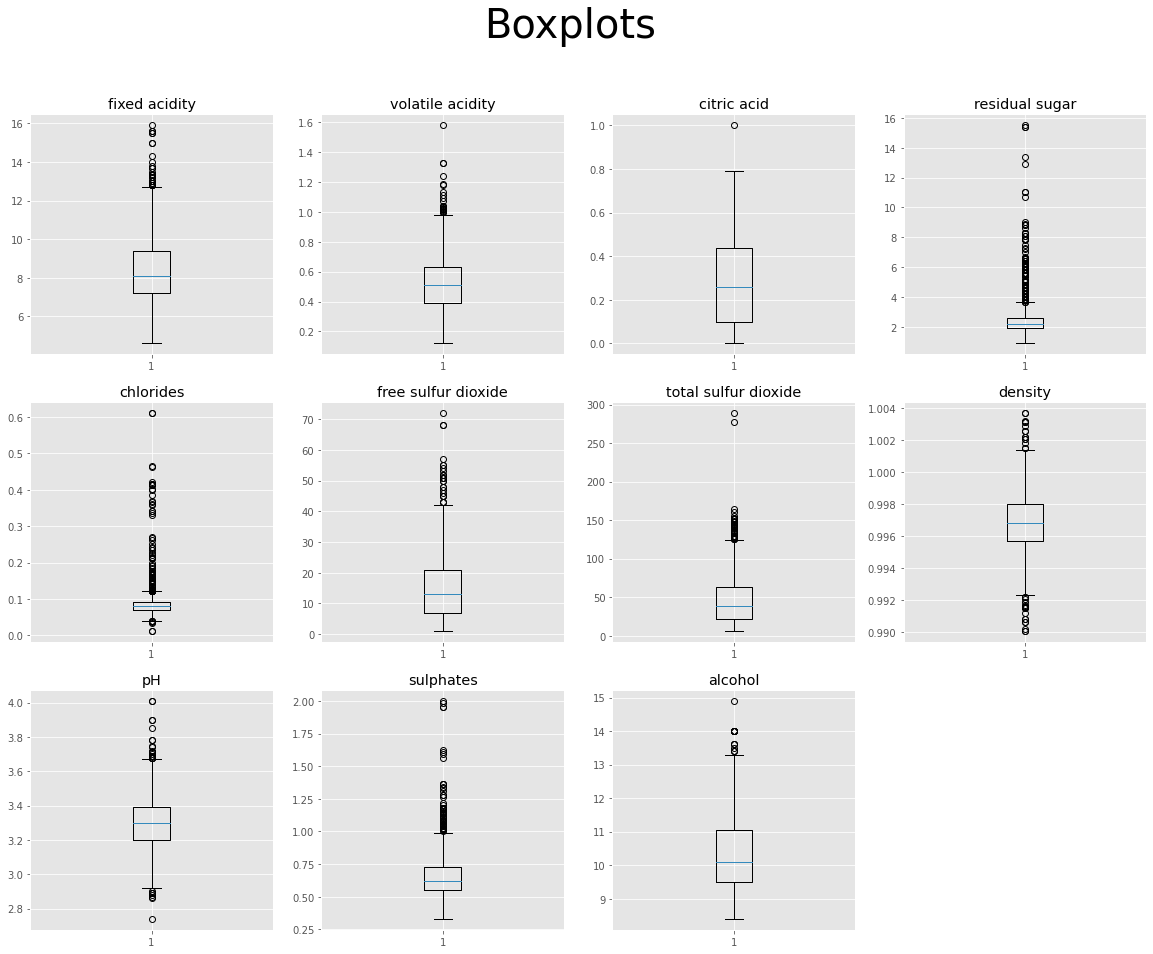

In [5]:
plt.style.use("ggplot")
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)
cols = train_data.columns[:-1]
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(train_data[cols[i]])
plt.show()

In [6]:
def logarithm_scaler(df):
    epsilon = 1e-10
    for i in df.columns:
        if df[i].min() == 0:
            df[i] = np.sqrt(df[i])
        else:
            df[i] = np.log(df[i])
    return df

transform_data = train_data.drop(columns=['quality']) 

train_data[transform_data.columns] = logarithm_scaler(transform_data)
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,-0.356675,0.000000,0.641854,-2.577022,2.397895,3.526361,-0.002202,1.255616,-0.579818,2.240710,5
1,2.054124,-0.127833,0.000000,0.955511,-2.322788,3.218876,4.204693,-0.003205,1.163151,-0.385662,2.282382,5
2,2.054124,-0.274437,0.200000,0.832909,-2.385967,2.708050,3.988984,-0.003005,1.181727,-0.430783,2.282382,5
3,2.415914,-1.272966,0.748331,0.641854,-2.590267,2.833213,4.094345,-0.002002,1.150572,-0.544727,2.282382,6
4,2.001480,-0.356675,0.000000,0.641854,-2.577022,2.397895,3.526361,-0.002202,1.255616,-0.579818,2.240710,5


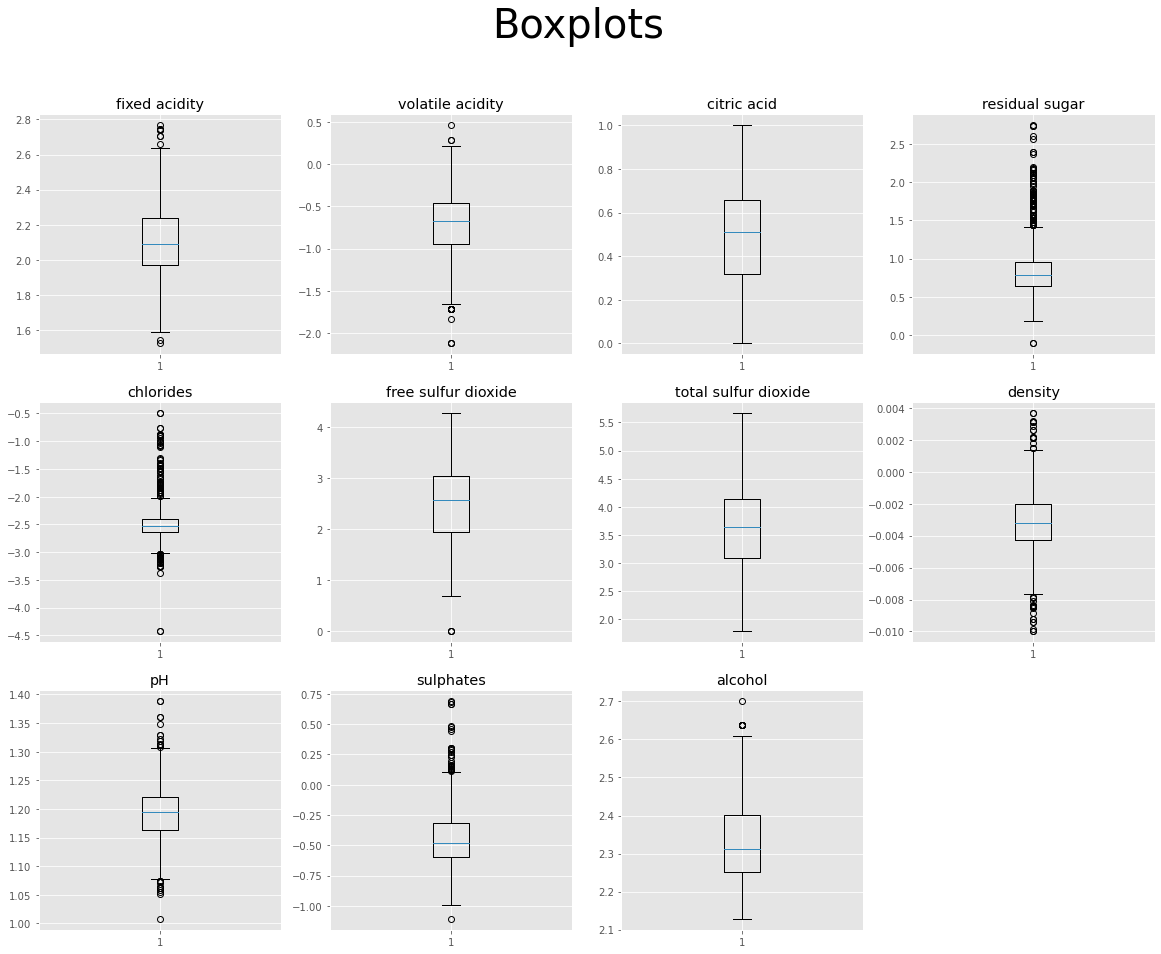

In [7]:
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)
cols = train_data.columns[:-1]
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(train_data[cols[i]])
plt.show()

<AxesSubplot:>

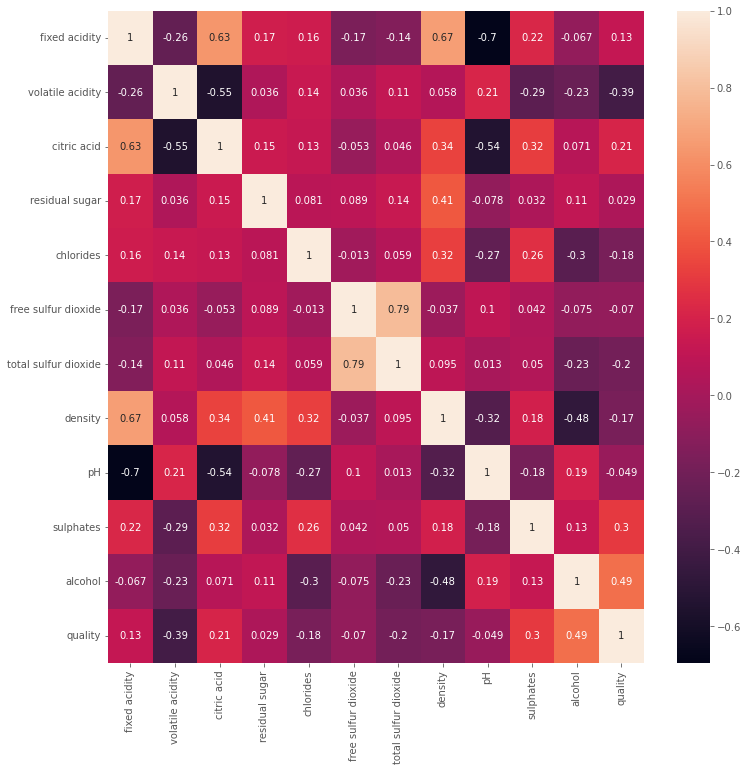

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(data = train_data.corr(), annot=True)

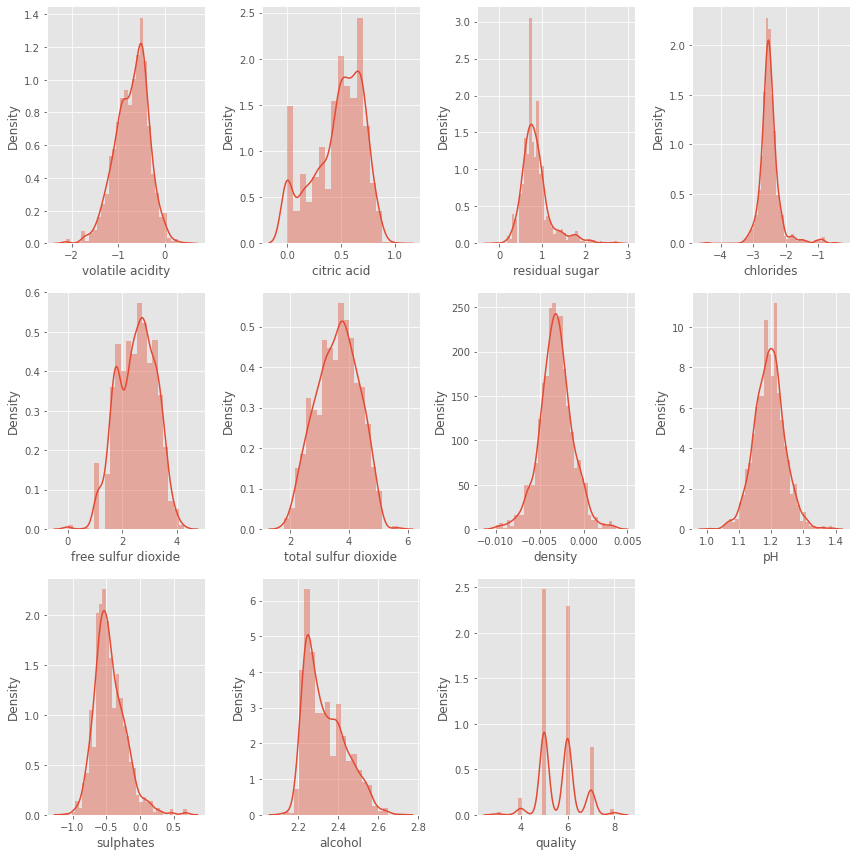

In [9]:
plt.figure(figsize=(12,12))
for i in range(1,12):
    plt.subplot(3,4,i)
    sns.distplot(train_data.iloc[:,i])
plt.tight_layout()
plt.show()

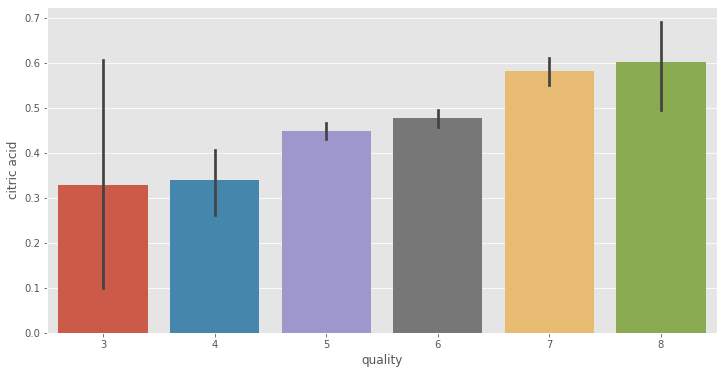

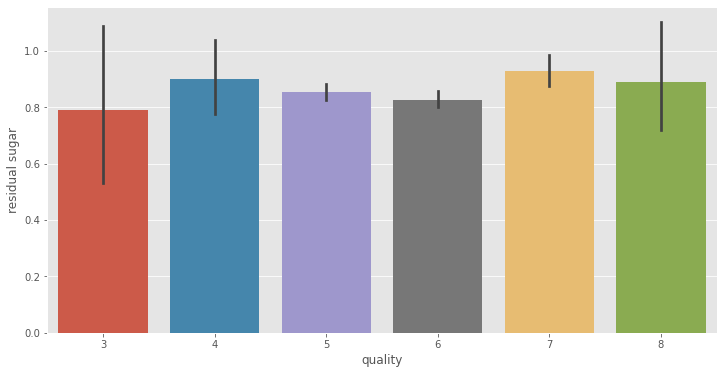

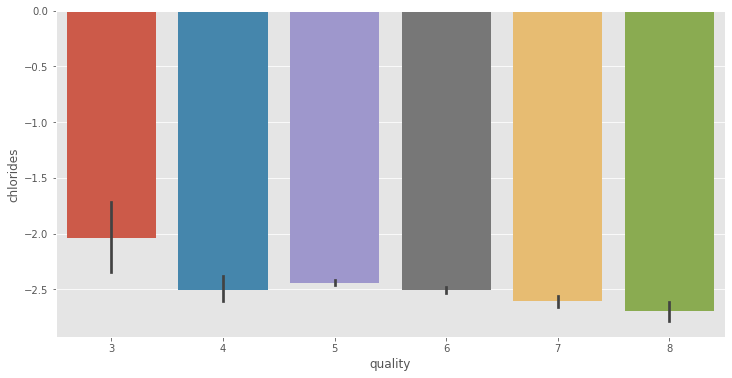

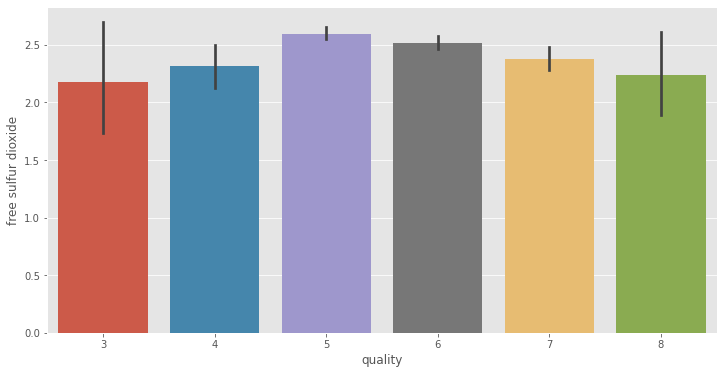

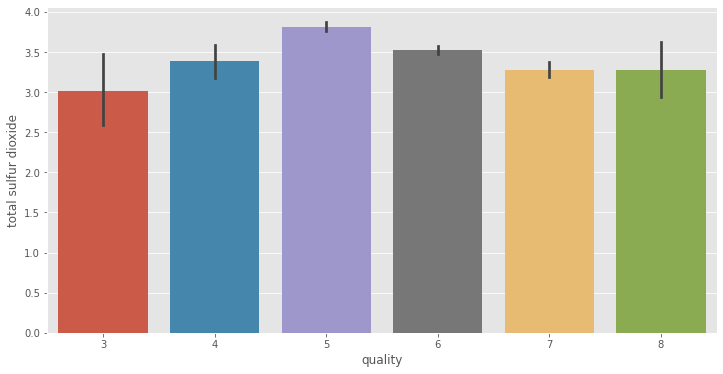

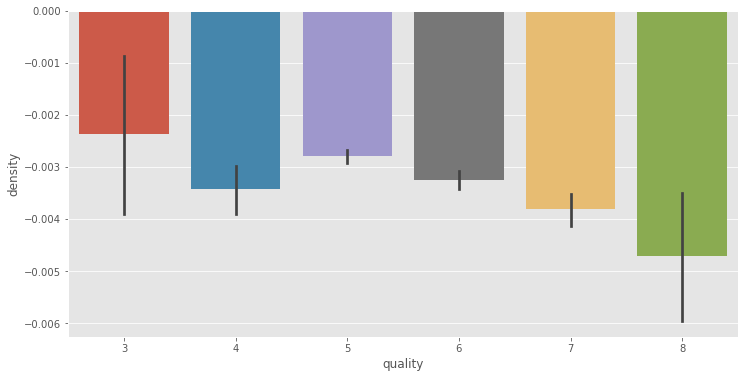

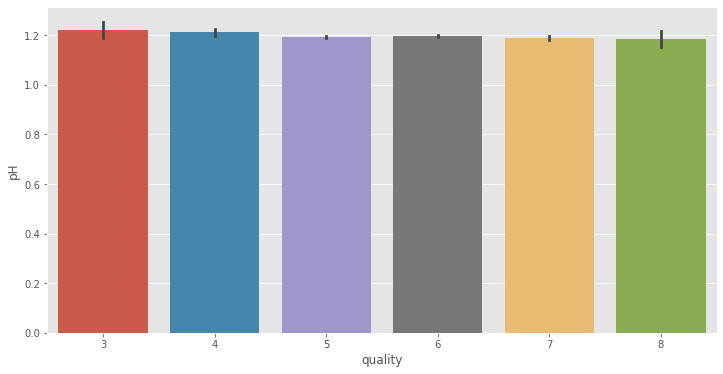

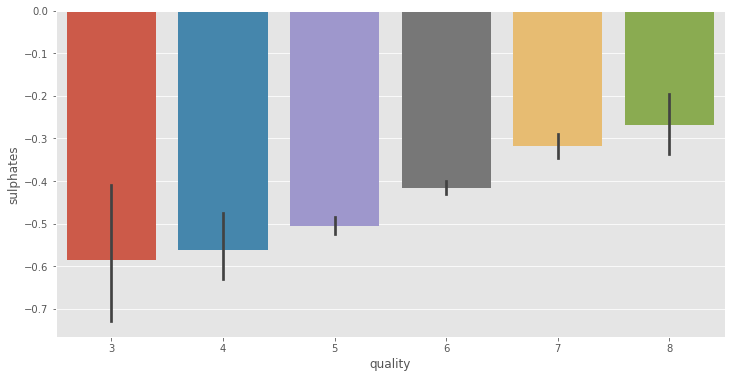

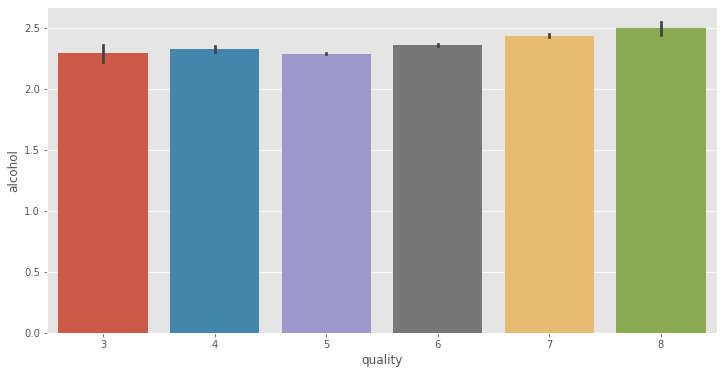

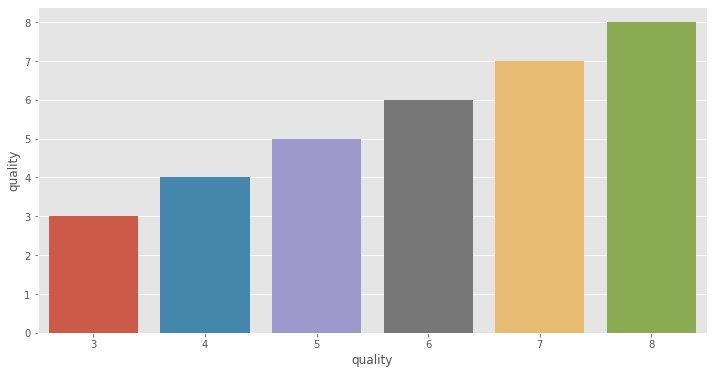

In [10]:
for i in range(10):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(x = 'quality', y = train_data.columns[i+2], data = train_data)

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

std_transform_data = ss.fit_transform(transform_data)

train_data[transform_data.columns] = std_transform_data
train_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.582548,0.986633,-2.045930,-0.596630,-0.261302,-0.179798,-0.115398,0.499969,1.326662,-0.584764,-0.962609,5
1,-0.315980,1.633831,-2.045930,0.285959,0.510187,1.011594,0.836932,-0.029140,-0.650576,0.260563,-0.546315,5
2,-0.315980,1.219215,-1.183048,-0.059027,0.318466,0.270293,0.534093,0.076724,-0.253346,0.064115,-0.546315,5
3,1.515987,-1.604770,1.182679,-0.596630,-0.301495,0.451928,0.682011,0.605727,-0.919555,-0.431982,-0.546315,6
4,-0.582548,0.986633,-2.045930,-0.596630,-0.261302,-0.179798,-0.115398,0.499969,1.326662,-0.584764,-0.962609,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1.042407,0.252698,0.578424,5.291411,2.880202,2.155788,1.327162,3.605703,-0.784643,0.801737,-1.397008,6
1435,1.042407,0.252698,0.578424,5.291411,2.880202,2.155788,1.327162,3.605703,-0.784643,0.801737,-1.397008,6
1436,0.942134,-0.741107,0.613651,-1.080192,2.163812,1.123278,1.251256,1.208145,-0.987332,0.064115,-1.967999,5
1437,-1.010714,1.744134,0.277451,2.011149,-0.510858,0.270293,0.077223,-0.574678,1.448160,-0.743104,0.698018,5


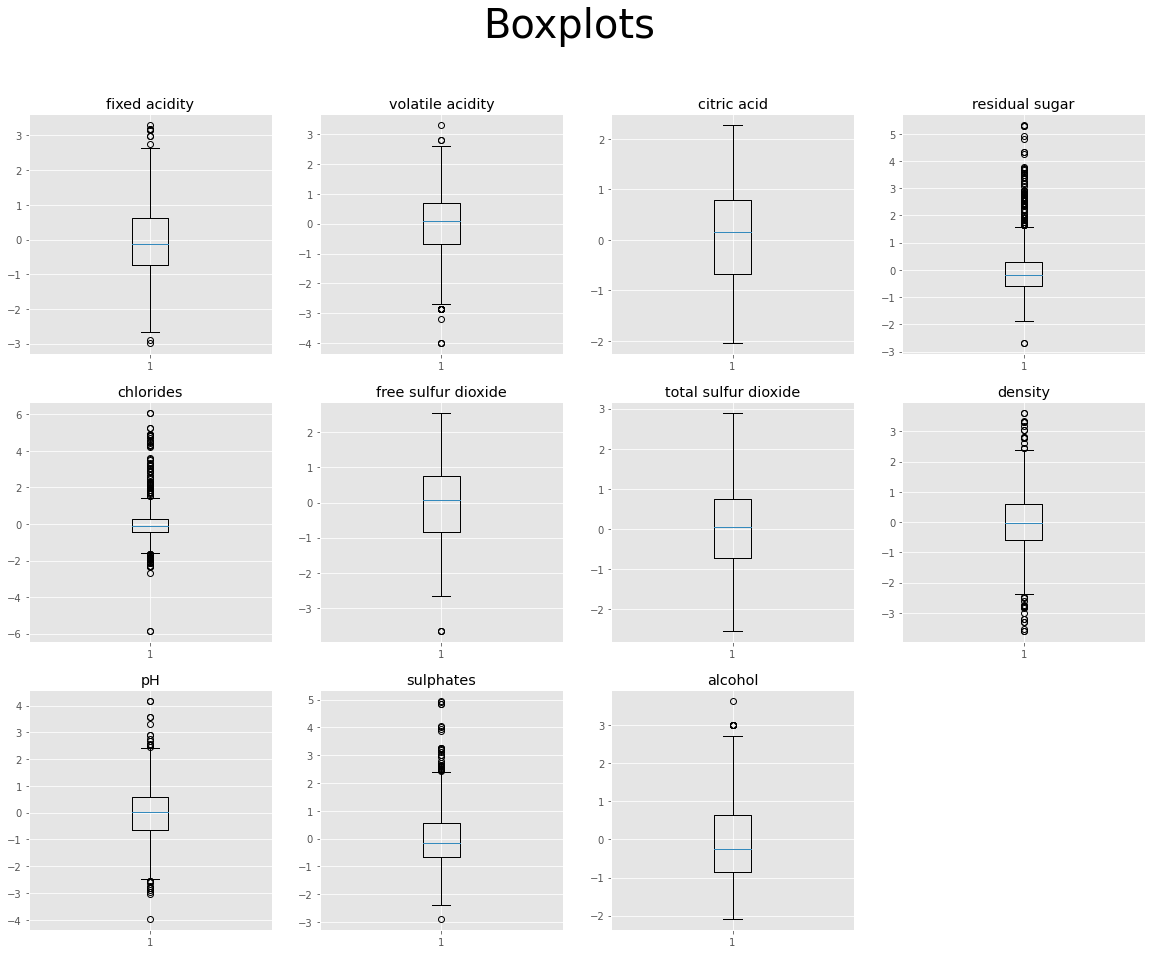

In [12]:
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)
cols = train_data.columns[:-1]
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(train_data[cols[i]])
plt.show()

In [13]:
before_remove = len(train_data)
train_data[transform_data.columns] = np.where(abs(std_transform_data) > 2.5, np.nan, std_transform_data)
train_data = train_data.dropna()
print('Removed : -', before_remove - len(train_data))

Removed : - 188


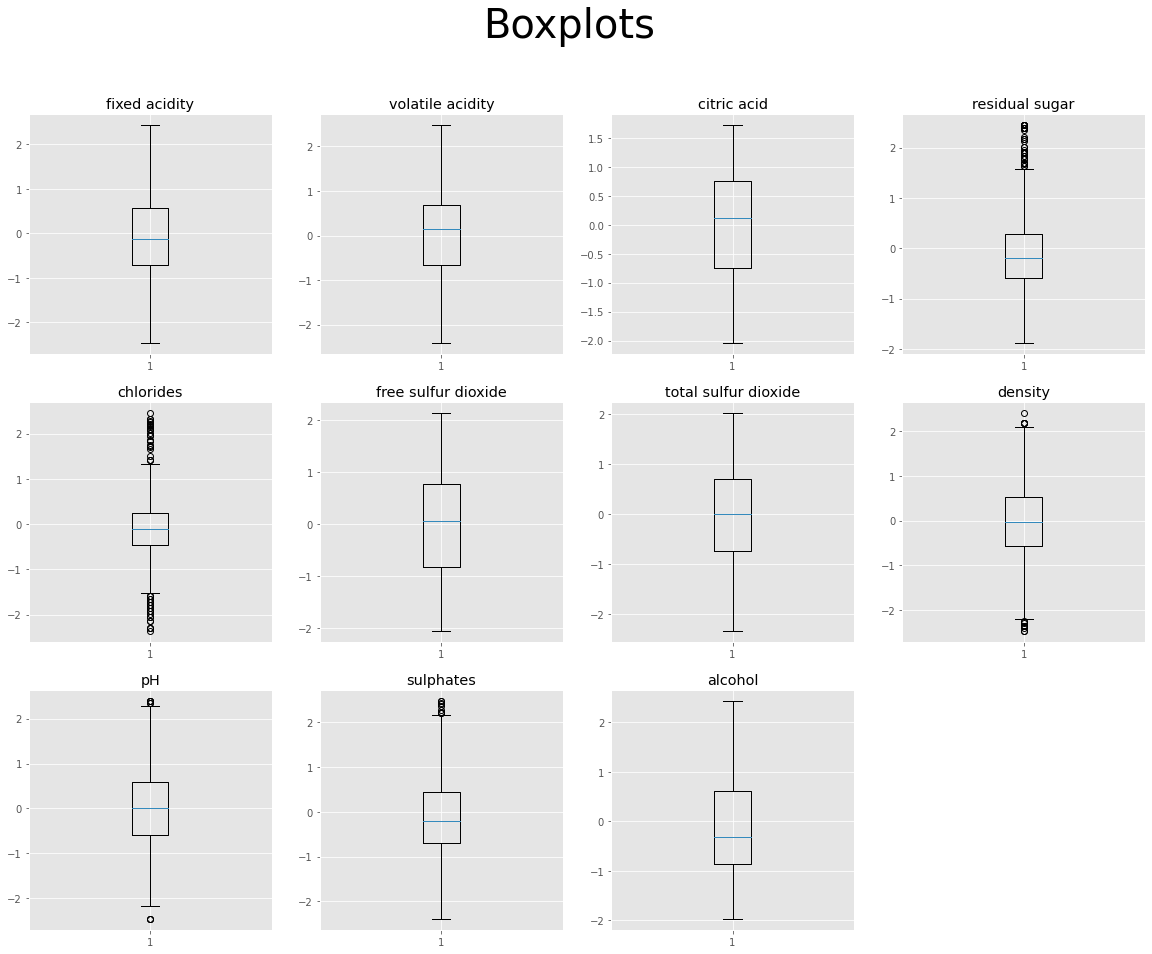

In [14]:
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)
cols = train_data.columns[:-1]
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(train_data[cols[i]])
plt.show()

In [15]:
before_aug = len(train_data)
train_data = train_data.append(train_data[train_data['quality'].isin([3,4,8])])
print('Augmented : +', len(train_data) - before_aug)

Augmented : + 56


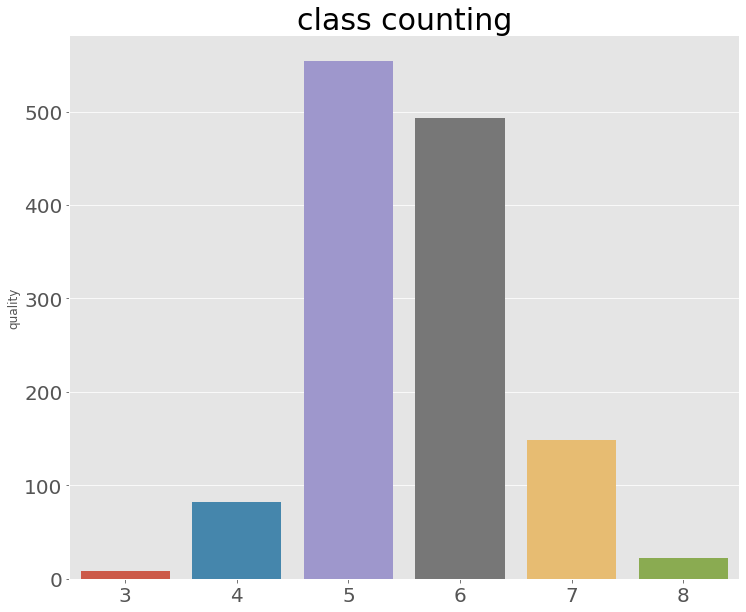

In [16]:
counted_values = train_data['quality'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('class counting', fontsize = 30)
value_bar_ax = sns.barplot(x=counted_values.index, y=counted_values)
value_bar_ax.tick_params(labelsize=20)

In [17]:
bins = (0, 5, 10)
group_names = ['bad', 'good']
train_data['quality'] = pd.cut(train_data['quality'], bins = bins, labels = group_names)
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.582548,0.986633,-2.045930,-0.596630,-0.261302,-0.179798,-0.115398,0.499969,1.326662,-0.584764,-0.962609,bad
1,-0.315980,1.633831,-2.045930,0.285959,0.510187,1.011594,0.836932,-0.029140,-0.650576,0.260563,-0.546315,bad
2,-0.315980,1.219215,-1.183048,-0.059027,0.318466,0.270293,0.534093,0.076724,-0.253346,0.064115,-0.546315,bad
3,1.515987,-1.604770,1.182679,-0.596630,-0.301495,0.451928,0.682011,0.605727,-0.919555,-0.431982,-0.546315,good
4,-0.582548,0.986633,-2.045930,-0.596630,-0.261302,-0.179798,-0.115398,0.499969,1.326662,-0.584764,-0.962609,bad


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [19]:
#Bad becomes 0 and good becomes 1 
train_data['quality'] = label_quality.fit_transform(train_data['quality'])
train_data['quality'].value_counts()

1    663
0    644
Name: quality, dtype: int64

In [20]:
#Now seperate the dataset as response variable and feature variabes
X = train_data.drop('quality', axis = 1)
y = train_data['quality']

In [21]:
# splitting the dataset
# train : val= 9 : 1

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42, shuffle=False)

In [22]:
def logistic(x):
    out = 1. / (1. + numpy.exp(-x))
    return out

def logistic_model(x, params):
    out = logistic(numpy.dot(x, params[0]) + params[1])
    return out

def model_loss(x, true_labels, params, _lambda=1.0):
    pred = logistic_model(x, params)
    
    loss = - (
        numpy.dot(true_labels, numpy.log(pred+1e-15)) +
        numpy.dot(1.-true_labels, numpy.log(1.-pred+1e-15))
    ) + _lambda * numpy.sum(params[0]**2)
    
    return loss

def classify(x, params):
    probabilities = logistic_model(x, params)
    labels = (probabilities >= 0.5).astype(float)
    return labels

def performance(predictions, answers, beta=1.0):
    true_idx = (answers == 1)  # the location where the answers are 1
    false_idx = (answers == 0)  # the location where the answers are 0
    
    # true positive: answers are 1 and predictions are also 1
    n_tp = numpy.count_nonzero(predictions[true_idx] == 1)
    
    # false positive: answers are 0 but predictions are 1
    n_fp = numpy.count_nonzero(predictions[false_idx] == 1)
    
    # true negative: answers are 0 and predictions are also 0
    n_tn = numpy.count_nonzero(predictions[false_idx] == 0)
    
    # false negative: answers are 1 but predictions are 0
    n_fn = numpy.count_nonzero(predictions[true_idx] == 0)
    
    # precision, recall, and f-score
    precision = n_tp / (n_tp + n_fp)
    recall = n_tp / (n_tp + n_fn)
    score = (
        (1.0 + beta**2) * precision * recall / 
        (beta**2 * precision + recall)
    )

    accuracy = (n_tp + n_tn) / (n_tp + n_fn + n_fp + n_tn)

    return precision, recall, score, accuracy

In [23]:
X_train = X_train.values
y_train = y_train.values

X_val = X_val.values
y_val = y_val.values

In [31]:
# a function to get the gradients of a logistic model
gradients = grad(model_loss, argnum=2)

# initialize parameters
w = numpy.zeros(X_train.shape[1], dtype=float)
b = 0.

# initial accuracy
pred_labels_test = classify(X_val, (w, b))
perf = performance(pred_labels_test, y_val)

print("Initial precision: {:.1f}%".format(perf[0]*100))
print("Initial recall: {:.1f}%".format(perf[1]*100))
print("Initial F-score: {:.1f}%".format(perf[2]*100))
print("Initial Accuracy: {:.1f}%".format(perf[3]*100))




# learning rate
lr = 1e-5

# a variable for the change in validation loss
change = numpy.inf

# a counter for optimization iterations
i = 0

# a variable to store the validation loss from the previous iteration
old_val_loss = 1e-15

# keep running if:
#   1. we still see significant changes in validation loss
#   2. iteration counter < 20000
while change >= 1e-5 and i < 50000:
    
    # calculate gradients and use gradient descents
    grads = gradients(X_train, y_train, (w, b))
    w -= (grads[0] * lr)
    b -= (grads[1] * lr)
    
    # validation loss
    val_loss = model_loss(X_val, y_val, (w, b))
    
    # calculate f-scores against the validation dataset
    pred_labels_val = classify(X_val, (w, b))
    score = performance(pred_labels_val, y_val)

    # calculate the chage in validation loss
    change = numpy.abs((val_loss-old_val_loss)/old_val_loss)

    # update the counter and old_val_loss
    i += 1
    old_val_loss = val_loss
    
    # print the progress every 10 steps
    if i % 10 == 0:
        print("{}...".format(i), end="")

print("")
print("")
print("Upon optimization stopped:")
print("    Iterations:", i)
print("    Validation loss:", val_loss)
print("    Validation precision:", score[0])
print("    Validation recall:", score[1])
print("    Validation F-score:", score[2])
print("    Validation Accuracy:", score[3])
print("    Change in validation loss:", change)

Initial precision: 32.8%
Initial recall: 100.0%
Initial F-score: 49.4%
Initial Accuracy: 32.8%
10...20...30...40...50...60...70...80...90...100...110...120...130...140...150...160...170...180...190...200...210...220...230...240...250...260...270...280...290...300...310...320...330...340...350...360...370...380...390...400...410...420...430...440...450...460...470...480...490...500...510...520...530...540...550...560...570...580...590...600...610...620...630...640...650...660...670...680...690...700...710...720...730...740...750...760...770...780...790...800...810...820...830...840...850...860...870...880...890...900...910...920...930...940...950...960...

Upon optimization stopped:
    Iterations: 962
    Validation loss: 60.85813779097783
    Validation precision: 0.59375
    Validation recall: 0.8837209302325582
    Validation F-score: 0.7102803738317758
    Validation Accuracy: 0.7633587786259542
    Change in validation loss: 9.913058997500693e-06


In [34]:
test_data = pd.read_csv('./data/winequality-red_test.csv')
test_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.670,0.02,2.20,0.072,31,92,0.99566,3.32,0.68,11.066667
1,7.2,0.370,0.32,2.00,0.062,15,28,0.99470,3.23,0.73,11.300000
2,7.4,0.785,0.19,5.20,0.094,19,98,0.99713,3.16,0.52,9.566667
3,6.9,0.630,0.02,1.90,0.078,18,30,0.99712,3.40,0.75,9.800000
4,6.9,0.580,0.20,1.75,0.058,8,22,0.99322,3.38,0.49,11.700000
...,...,...,...,...,...,...,...,...,...,...,...
155,6.2,0.600,0.08,2.00,0.090,32,44,0.99490,3.45,0.58,10.500000
156,5.9,0.550,0.10,2.20,0.062,39,51,0.99512,3.52,0.76,11.200000
157,6.3,0.510,0.13,2.30,0.076,29,40,0.99574,3.42,0.75,11.000000
158,5.9,0.645,0.12,2.00,0.075,32,44,0.99547,3.57,0.71,10.200000


In [35]:
transform_data = test_data 

test_data[test_data.columns] = logarithm_scaler(transform_data)
test_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.987874,-0.400478,0.141421,0.788457,-2.631089,3.433987,4.521789,-0.004349,1.199965,-0.385662,2.403938
1,1.974081,-0.994252,0.565685,0.693147,-2.780621,2.708050,3.332205,-0.005314,1.172482,-0.314711,2.424803
2,2.001480,-0.242072,0.435890,1.648659,-2.364460,2.944439,4.584967,-0.002874,1.150572,-0.653926,2.258285
3,1.931521,-0.462035,0.141421,0.641854,-2.551046,2.890372,3.401197,-0.002884,1.223775,-0.287682,2.282382
4,1.931521,-0.544727,0.447214,0.559616,-2.847312,2.079442,3.091042,-0.006803,1.217876,-0.713350,2.459589


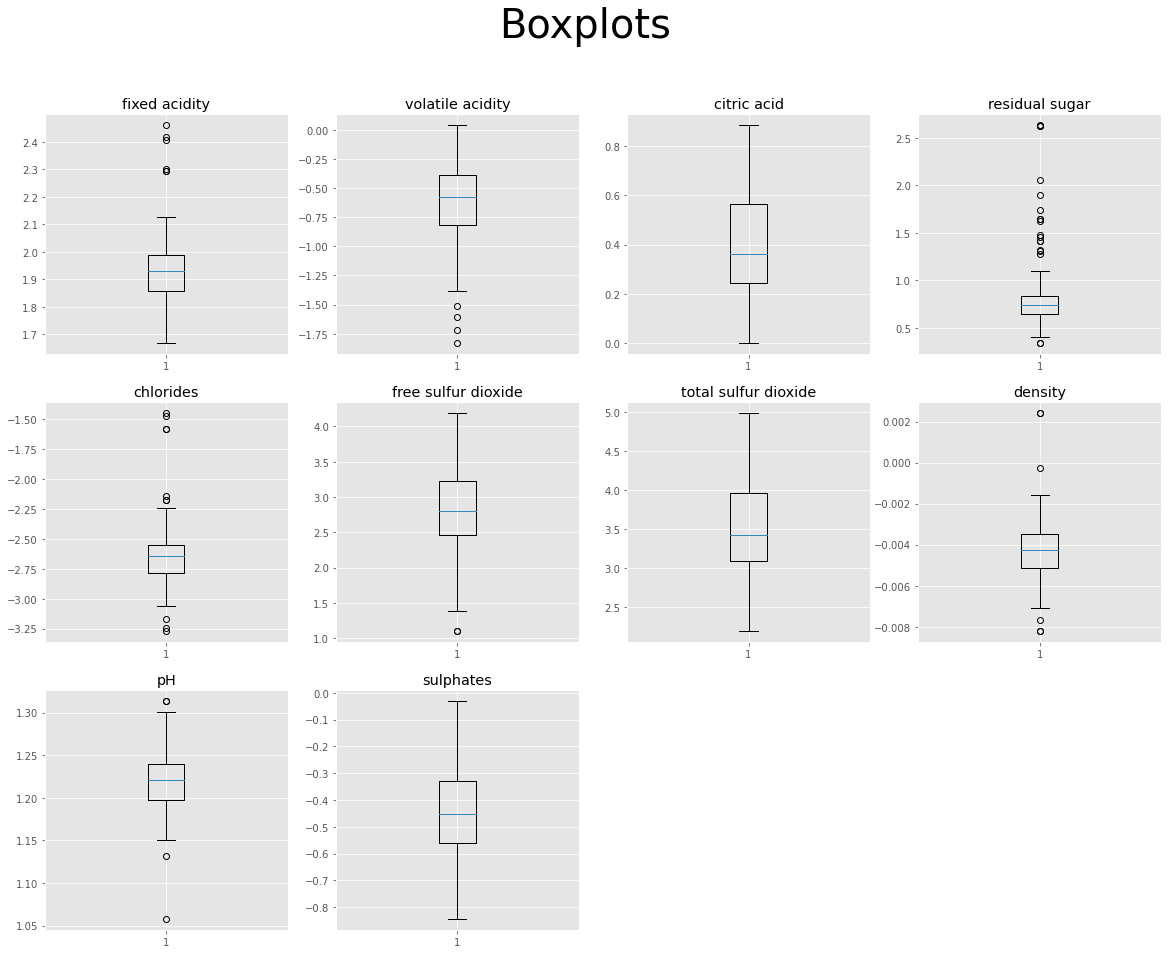

In [36]:
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)
cols = test_data.columns[:-1]
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(test_data[cols[i]])
plt.show()

In [37]:
std_transform_data = ss.fit_transform(transform_data)

test_data[transform_data.columns] = std_transform_data
test_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.424930,0.676745,-1.258686,-0.077541,0.019224,1.105076,1.565695,-0.061332,-0.534726,0.364673,0.557518
1,0.316853,-1.033932,0.804853,-0.333209,-0.531728,-0.094135,-0.312728,-0.683151,-1.275161,0.815793,0.803036
2,0.531536,1.133115,0.173552,2.229933,1.001622,0.296367,1.665458,0.889667,-1.865462,-1.340984,-1.156361
3,-0.016621,0.499395,-1.258686,-0.470803,0.314143,0.207051,-0.203784,0.883202,0.106779,0.987645,-0.872808
4,-0.016621,0.261159,0.228629,-0.691405,-0.777454,-1.132564,-0.693537,-1.642966,-0.052171,-1.718805,1.212360
...,...,...,...,...,...,...,...,...,...,...,...
155,-0.854797,0.358830,-0.570840,-0.333209,0.841401,1.157523,0.400983,-0.553556,0.500099,-0.646681,-0.060977
156,-1.243412,0.108148,-0.408461,-0.077541,-0.531728,1.484321,0.634109,-0.411032,1.041275,1.071860,0.698441
157,-0.729427,-0.109390,-0.192861,0.041700,0.218436,0.994905,0.250482,-0.009541,0.264796,0.987645,0.486419
158,-1.243412,0.567187,-0.261660,-0.333209,0.169634,1.157523,0.400983,-0.184353,1.421280,0.639167,-0.402070


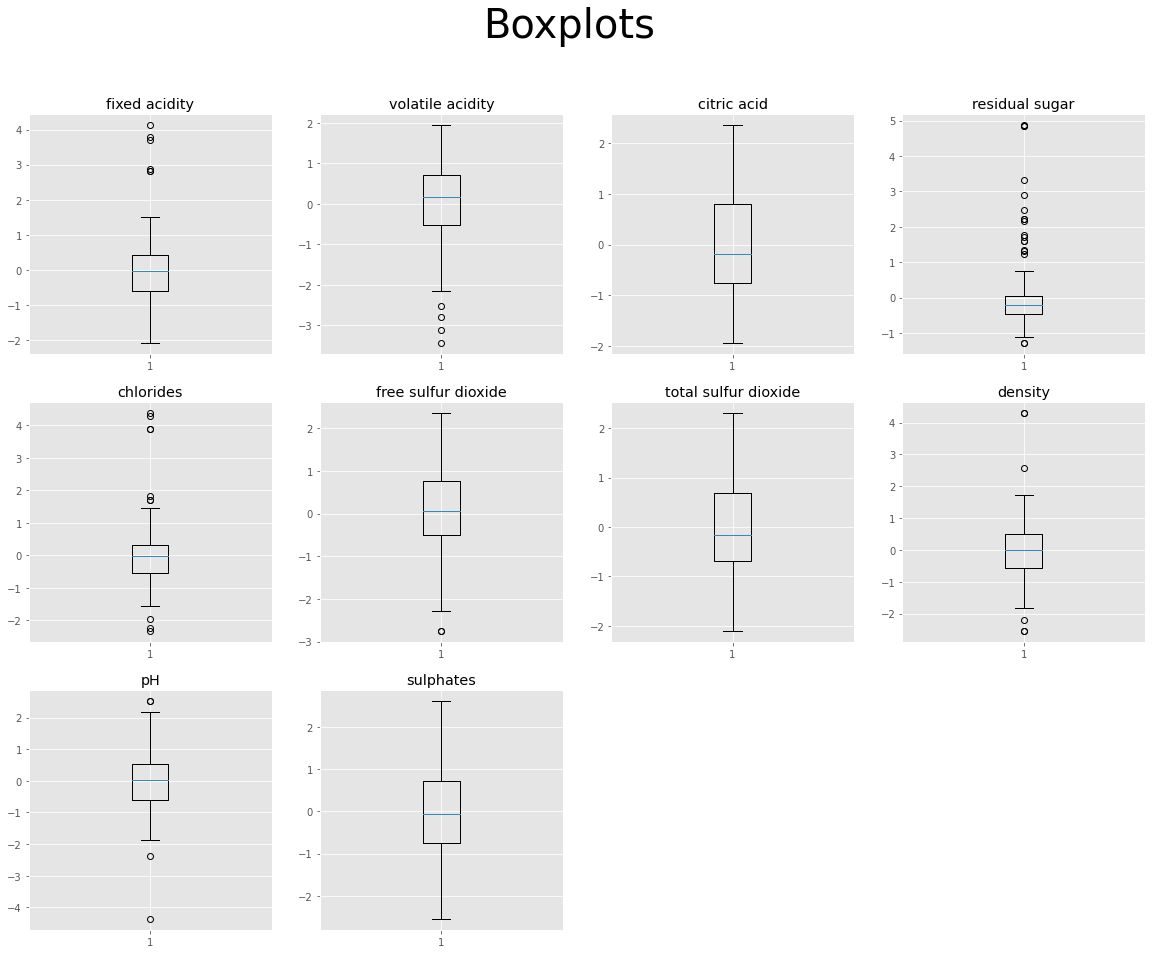

In [38]:
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)
cols = test_data.columns[:-1]
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(test_data[cols[i]])
plt.show()

In [39]:
test_data = test_data.values

In [40]:
pred_labels_test = classify(test_data, (w, b))

In [41]:
sample_submisson= pd.read_csv("./sample_sub.csv")
sample_submisson['quality'] = list(map(int,pred_labels_test.tolist()))
sample_submisson.to_csv("./ver8_submission.csv",index=False)